In [27]:
# ==========================================
# Step 0: Libraries
# ==========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
# ==========================================
# Step 1: Mount Google Drive
# ==========================================
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
# ==========================================
# Step 2: Data Loading (From Drive)
# ==========================================
import pandas as pd

# This is the dataset path from my own drive, but in case you're running the project from your own PC, here is the URL of the dataset:
# https://www.kaggle.com/datasets/nalisha/world-happiness-ranking-dataset?resource=download
file_path = '/content/drive/MyDrive/AI-Project/world_happiness_report.csv'

df = pd.read_csv(file_path)

# Verify it loaded
print("Columns found:")
print(df.columns.tolist())
display(df.head())

Columns found:
['Unnamed: 0', 'Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual', 'year']


,Unnamed: 0,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
0,0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


In [31]:
# ==========================================
# Step 3: Feature Selection & Cleaning
# ==========================================
from sklearn.impute import KNNImputer

target = 'Happiness Score'
features = [
    'Economy (GDP per Capita)',
    'Family',
    'Health (Life Expectancy)',
    'Freedom',
    'Trust (Government Corruption)',
    'Generosity'
]

# 1. Dropping rows where the Target (Happiness) is missing because we cannot train on data where we don't know the answer!
df_clean = df.dropna(subset=[target])

# 2. Define X and y from the clean data
X = df_clean[features]
y = df_clean[target]

print(f"Original Rows: {len(df)}")
print(f"Rows after dropping empty targets: {len(df_clean)}")

# 3. Now checking for missing FEATURES (GDP, Freedom, etc.)
print("\nMissing features values:")
print(X.isnull().sum())

# If there are still missing features, use KNN to fill them
imputer = KNNImputer(n_neighbors=5)
X_filled = imputer.fit_transform(X)
X = pd.DataFrame(X_filled, columns=features)

Original Rows: 1231
Rows after dropping empty targets: 315

Missing features values:
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
dtype: int64


In [32]:
# ==========================================
# Step 4: Data Splitting
# ==========================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Shape: {X_train.shape}")
print(f"Testing Shape: {X_test.shape}")

Training Shape: (252, 6)
Testing Shape: (63, 6)


Mean Squared Error: 0.1976
Accuracy (R2 Score): 0.8662


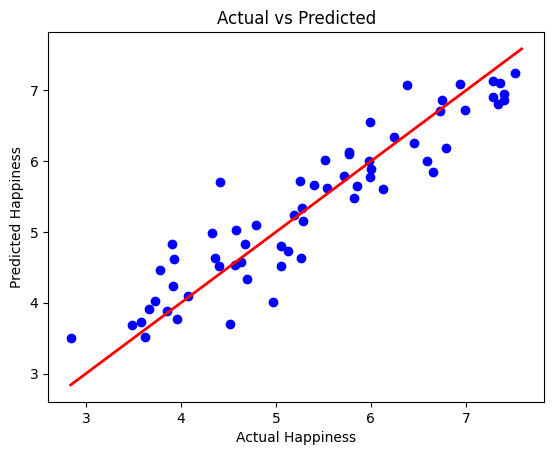

In [33]:
# ==========================================
# Step 5: Model Training & Evaluation
# ==========================================
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Accuracy (R2 Score): {r2:.4f}")

# Plot
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2)
plt.xlabel("Actual Happiness")
plt.ylabel("Predicted Happiness")
plt.title("Actual vs Predicted")
plt.show()

--- Classification Report (Group Accuracy) ---
              precision    recall  f1-score   support

         Low       0.79      0.65      0.71        17
      Medium       0.69      0.74      0.71        27
        High       0.80      0.84      0.82        19

    accuracy                           0.75        63
   macro avg       0.76      0.74      0.75        63
weighted avg       0.75      0.75      0.75        63



<Figure size 800x600 with 0 Axes>

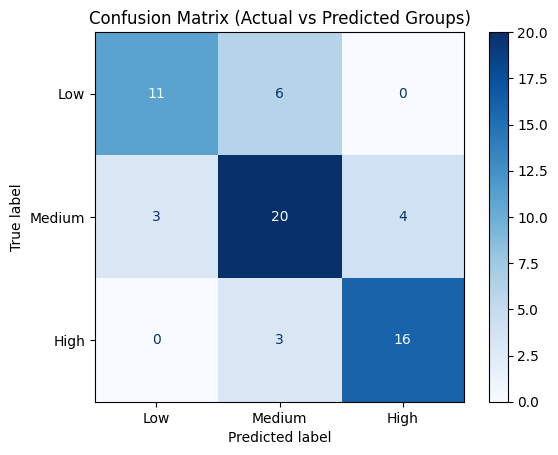

In [34]:
# ==========================================
# Step 6: Classification Check (Matrix + Report)
# ==========================================
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import pandas as pd
import matplotlib.pyplot as plt

# 1. Define bins to convert numbers into categories
# Logic: Low (<4.5), Medium (4.5-6.0), High (>6.0)
def classify_happiness(score):
    if score < 4.5:
        return 'Low'
    elif score < 6.0:
        return 'Medium'
    else:
        return 'High'

# 2. Convert Actual and Predicted numbers to classes
# We use the y_test (actual) and y_pred (predicted) from the previous step
y_test_class = y_test.apply(classify_happiness)
y_pred_class = pd.Series(y_pred).apply(classify_happiness)

# 3. Print the Text Report (Accuracy, Precision, etc.)
print("--- Classification Report (Group Accuracy) ---")
print(classification_report(y_test_class, y_pred_class, labels=['Low', 'Medium', 'High']))

# 4. Plot the Confusion Matrix
cm = confusion_matrix(y_test_class, y_pred_class, labels=['Low', 'Medium', 'High'])

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low', 'Medium', 'High'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix (Actual vs Predicted Groups)")
plt.show()

In [36]:
# ==========================================
# Step 7: Test the Model (Interactive)
# ==========================================
print("--- Predict Happiness for a New Country ---")
print("Enter values between 0.0 and 2.0 roughly (based on dataset range)")

# 1. Get User Input for each feature
# We use float() to convert the text input into numbers
try:
    gdp = float(input("Enter Economy (GDP per Capita): "))
    family = float(input("Enter Family Support: "))
    health = float(input("Enter Health (Life Expectancy): "))
    freedom = float(input("Enter Freedom: "))
    trust = float(input("Enter Trust (Gov Corruption): "))
    generosity = float(input("Enter Generosity: "))

    # 2. Organize the data into a DataFrame (just like the training data)
    new_country_data = pd.DataFrame({
        'Economy (GDP per Capita)': [gdp],
        'Family': [family],
        'Health (Life Expectancy)': [health],
        'Freedom': [freedom],
        'Trust (Government Corruption)': [trust],
        'Generosity': [generosity]
    })

    # 3. Make the Prediction
    prediction = model.predict(new_country_data)

    # 4. Show Result
    print(f"\n------------------------------------------")
    print(f"Predicted Happiness Score: {prediction[0]:.2f} / 10")
    print(f"------------------------------------------")

    # Optional: Give a verdict based on the score
    if prediction[0] > 7:
        print("Welcome to Switzerland. 😃")
    elif prediction[0] > 4:
        print("You can still buy your dream car. 😐")
    else:
        print("Oh no, you live in Egypt. 😢")

except ValueError:
    print("Error: Please enter valid numbers only (e.g., 1.2, 0.5).")

--- Predict Happiness for a New Country ---
Enter values between 0.0 and 2.0 roughly (based on dataset range)
Enter Economy (GDP per Capita): 0
Enter Family Support: 0
Enter Health (Life Expectancy): 0
Enter Freedom: 0
Enter Trust (Gov Corruption): 0
Enter Generosity: 0

------------------------------------------
Predicted Happiness Score: 2.24 / 10
------------------------------------------
Oh no, you live in Egypt. 😢
